<a href="https://colab.research.google.com/github/SarahAlhugail/Machine_learning/blob/main/_SDA_ML_Week2_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression


# Import what you feel is neccessary from scikit-learn


<center><H1>Adult Dataset Classification</H1></center>


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



In [ ]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]

In [ ]:
training.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,<=50K.


In [ ]:
test.describe(exclude=[np.number])

,workclass,education,marital_status,ooccupation,relationship,sex,native_country,target
count,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,10860,14662,12435


### **Determine your baseline model accuracy**

In [ ]:
training=training.dropna()
test=test.dropna()


In [ ]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [ ]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [ ]:
training['target'] = training['target'].map({' <=50K': 1, ' >50K': 0}).astype(int)
test['target'] = test['target'].map({' <=50K.': 1, ' >50K.': 0}).astype(int)



In [ ]:
# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]

In [ ]:

# let's predict something simple... like the average
np.mean(y_train)

0.7591904425539756

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = np.mean(y_train)  # what value to predict?

baseline_model(n_predictions, baseline_value)

0        0.75919
1        0.75919
2        0.75919
3        0.75919
4        0.75919
          ...   
32556    0.75919
32557    0.75919
32558    0.75919
32559    0.75919
32560    0.75919
Length: 32561, dtype: float64

### **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


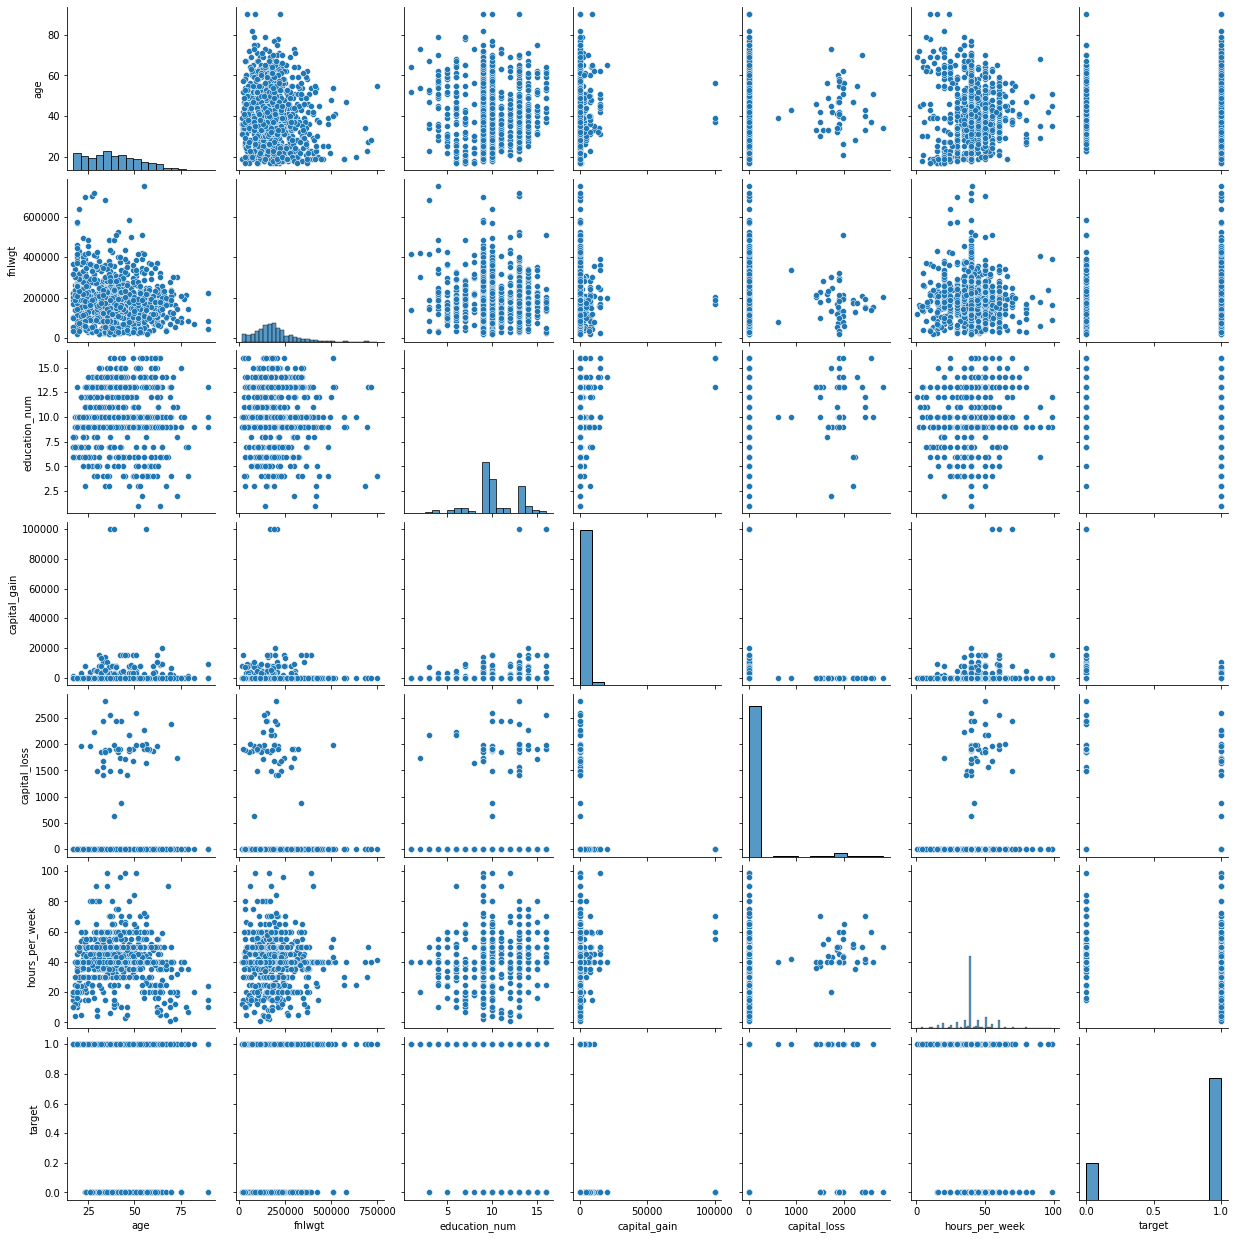

In [ ]:


sns.pairplot(training.sample(1000))

[Text(0.5, 1.0, 'The Relationship  between Age and the Hours per week ')]

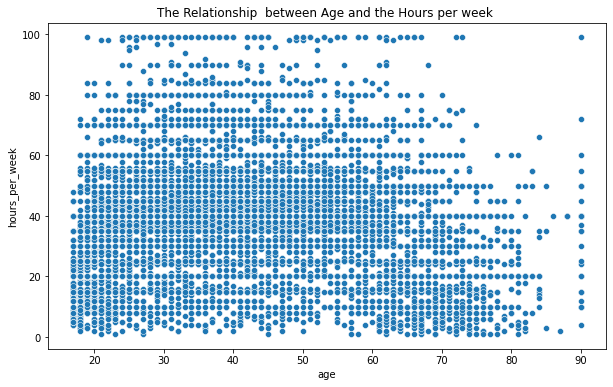

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='age'	, y='hours_per_week', data=training ).set(title="The Relationship  between Age and the Hours per week ")

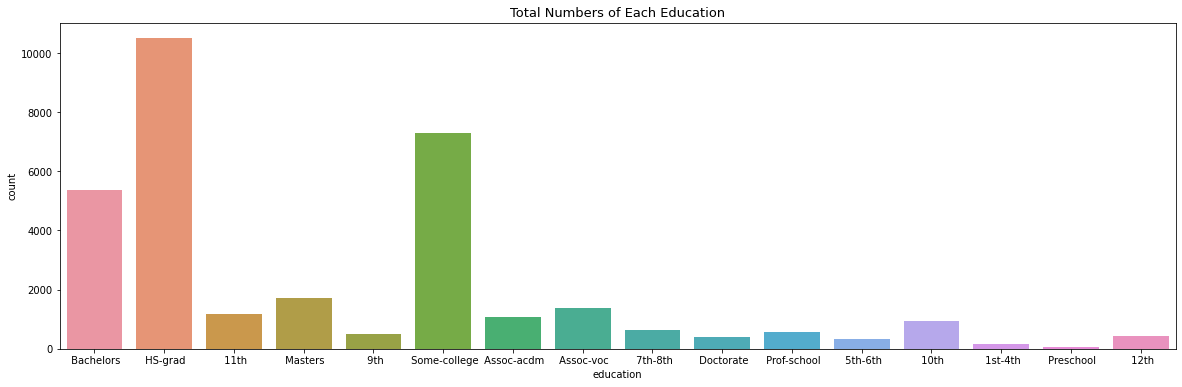

In [ ]:
plt.figure(figsize=(20,6))

sns.countplot(x='education', data=training).set_title('Total Numbers of Each Education', fontsize=13);


### **Clean and Preprocess your Data** (Hint: One-Hot-Encode Categoricals)
Another hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
training['sex'] = training['sex'].map({' Male': 1, ' Female': 0}).astype(int)
test['sex'] = test['sex'].map({' Male': 1,  ' Female': 0}).astype(int)

In [ ]:
training.describe(exclude=[np.number])

,workclass,education,marital_status,ooccupation,relationship,sex,native_country
count,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States
freq,22696,10501,14976,4140,13193,21790,29170


In [ ]:
df = training.reindex(columns=['age','fnlwgt','capital_gain','capital_loss','hours_per_week','education_num','workclass',	'education','marital_status',	'ooccupation','relationship','native_country','sex', 'target'])
df
df_train = pd.get_dummies(df.iloc[:,0:15])
df_train


,age,fnlwgt,capital_gain,capital_loss,hours_per_week,education_num,sex,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,2174,0,40,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,13,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,9,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,7,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,13,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,12,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,0,0,40,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,0,0,40,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,0,0,20,9,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
corr = df_cat.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
training.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,1


## test

In [ ]:
df_t = training.reindex(columns=['age','fnlwgt','capital_gain','capital_loss','hours_per_week','education_num','workclass',	'education','marital_status',	'ooccupation','relationship','native_country','sex', 'target'])
df_t
df_test = pd.get_dummies(df_t.iloc[:,0:15])
df_test

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,education_num,sex,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,2174,0,40,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,13,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,9,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,7,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,13,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,12,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,0,0,40,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,0,0,40,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,0,0,20,9,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### **Create a kNN model** 



In [ ]:
# Create Train

vars= ['marital_status_ Married-civ-spouse','marital_status_ Never-married','relationship_ Husband','education_num','age']
X_train = df_train[vars]
y_train = df_train["target"]

# Create Test
X_test = df_test[vars]
y_test = df_test["target"]

[Text(0.5, 1.0, 'The Relationship  between Age and the Education  ')]

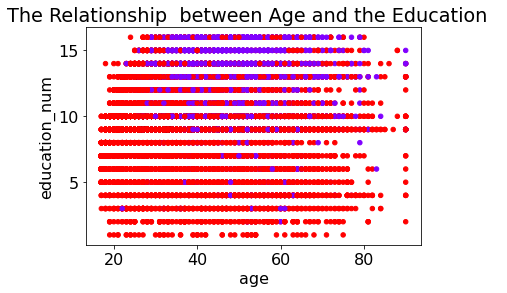

In [ ]:
X_train.plot(kind='scatter', x='age', y='education_num', c=y_train.tolist(), cmap=('rainbow'), sharex=False).set(title="The Relationship  between Age and the Education  ")

In [ ]:
KNeighborsClassifier()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test)


array([1, 0, 1, ..., 1, 1, 1])

In [ ]:

accuracy_score(y_test, knn.predict(X_test))

0.8115844107981942

### **Show us your confusion matrix and explain the results**

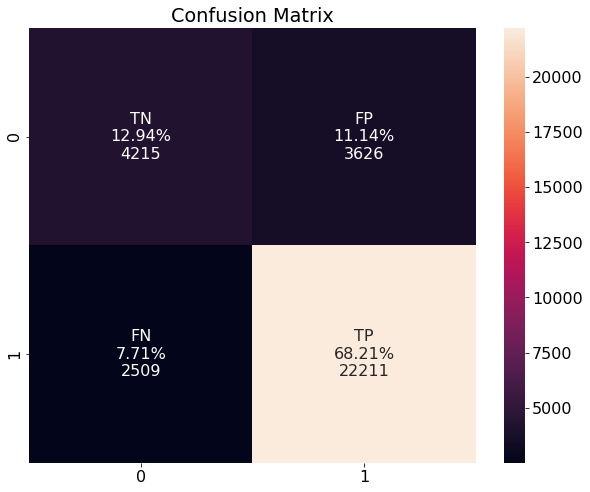

In [ ]:

y_pred = knn.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

**<=50K = 1   ,   >50K = 0**


TP = predicted  <=50K, is  <=50K

FP = predicted  <=50K, is >50K

TN = predicted >50K, is >50K

FN = predicted >50K, is <=50K


**It's good result because we have  TP is higher than FP, TN is higher than FN**

### **Compare to Baseline model and explain the results**

In [ ]:

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_preds = baseline_model(n_predictions, baseline_value)

accuracy_score(y_test, baseline_preds)

0.7591904425539756

 KNN shows us accuracy score higher  than .

 The KNN accuracy score `0.8115844107981942`
is higher than Baseline accuracy score `0.7591904425539756`




### **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



In [ ]:

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
preds = lr.predict(X_test)

accuracy_score(y_test, preds)

0.8183409600442247

The LogisticRegression accuracy score `0.8183409600442247` is the highest score 


### **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid

In [ ]:
p_grid = {'fit_intercept': [True, False], 'max_iter': [100, 250, 1000, 10000]}

grid = GridSearchCV(lr, p_grid,cv=10 )
grid


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_


{'fit_intercept': True, 'max_iter': 100}

In [ ]:
lr = LogisticRegression(fit_intercept =True, max_iter =100)

lr.fit(X_train, y_train)

lr.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
preds = lr.predict(X_test)

accuracy_score(y_test, preds)

0.8183409600442247